#**Name: Himasish Ghosal ; Roll No: MA24M010**

###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [39]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

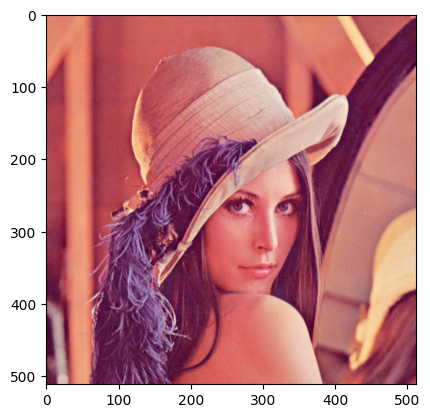

In [40]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

It is always good to know basic image details, such as its dimensions, before one proceeds for the experiments.

###### Task1.1 : write code to find image dimension and print it

In [41]:
print(image.shape)

(512, 512, 3)


Is this image RGB (no of channels?), gray or binary (intensity range?)? What can you say about aspect ratio (defined as width/height) of this image?


> yes it is an RGB image, as it has 3 channels .The dimensions are 512 pixels in height and 512 pixels in width . the aspect ratio (width/height) is 512/512=1:1







###### Task1.2:  Visualization of each channel

An RGB image can be decomposed into three channels, Red(R), Green(G), Blue(B). In this subsection, let's visualize each channel separately.




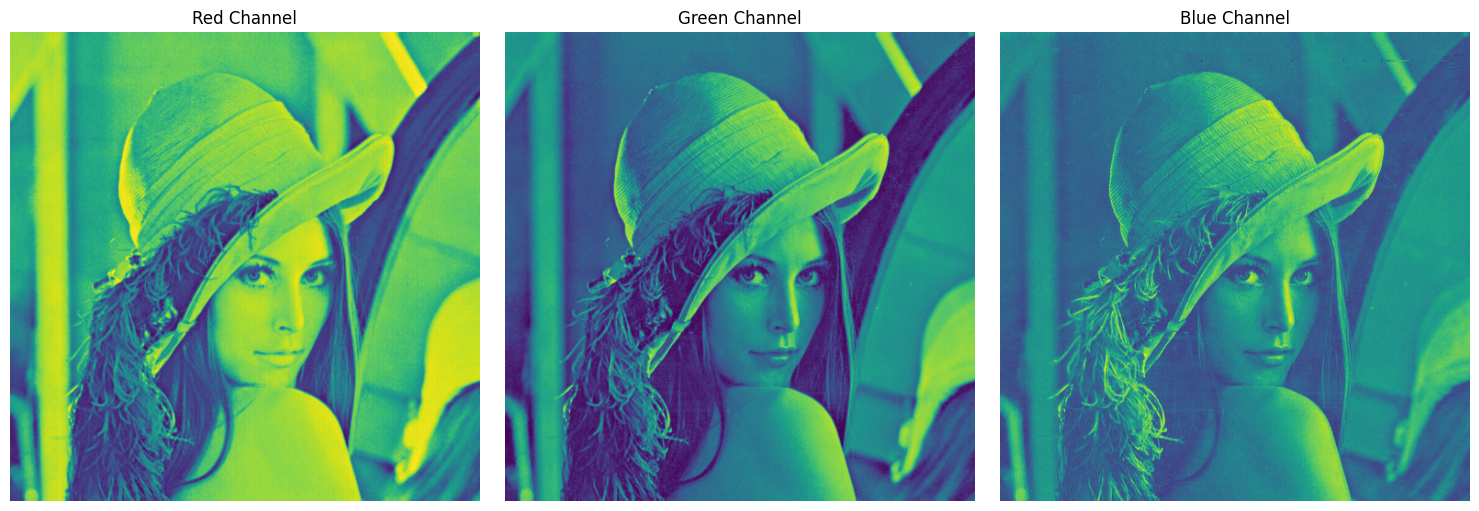

In [42]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
   # Extract the specified channel
    output = image[:, :, channel]


    return output    # 'output' is image's particular channel values

# To Visualize each channel in a separate subplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(VisualizeChannel(image, 0))
plt.title("Red Channel")
plt.axis('off') # Hide axes for cleaner visualization

plt.subplot(1, 3, 2)
plt.imshow(VisualizeChannel(image, 1))
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(VisualizeChannel(image, 2))
plt.title("Blue Channel")
plt.axis('off')

plt.tight_layout()
plt.show()

Can you also comment on the maximum and minimum intensity values of each channel? What can you say about the range of intensity values?

In [43]:
red_channel = VisualizeChannel(image, 0)
green_channel = VisualizeChannel(image, 1)
blue_channel = VisualizeChannel(image, 2)

print(f"Red Channel - Min: {red_channel.min()}, Max: {red_channel.max()}")
print(f"Green Channel - Min: {green_channel.min()}, Max: {green_channel.max()}")
print(f"Blue Channel - Min: {blue_channel.min()}, Max: {blue_channel.max()}")
print(f"Red Channel range: {red_channel.max() - red_channel.min()}")
print(f"Green Channel range: {green_channel.max() - green_channel.min()}")
print(f"Blue Channel range: {blue_channel.max() - blue_channel.min()}")


Red Channel - Min: 0.21176470816135406, Max: 1.0
Green Channel - Min: 0.0117647061124444, Max: 0.9725490212440491
Blue Channel - Min: 0.0313725508749485, Max: 0.8823529481887817
Red Channel range: 0.7882353067398071
Green Channel range: 0.9607843160629272
Blue Channel range: 0.8509804010391235


# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

*We* may need a gray image for some of our applications. One can also convert RGB to gray to reduce computational complexity. For this part, we will convert an RGB image to grayscale. Refer this link for explanation:  https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

In [44]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''

    # Convert to grayscale using a weighted average (common method)
    gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])


    return gray

We can also convert a gray image to a binary image. For task2.2, consider a gray image as input (you may take the output from task2.1 as input).

Write code to threshold a gray image such that

I(x,y) = 1 if I(x,y) >= T
       = 0   if I(x,y) < T   where T is threshold

Though there are proper methods( such as the Otsu method) to find a suitable T, we will not go into details of those algorithms and randomly select T values and visualize the result.

###### Task2.2 : Gray to Binary

Before you proceed to code, Can you comment on the valid range of T? (Hint:

---

Task1.2)


> The RGB2Gray Function produces floating-point values typically in the range 0.0 to 1.0, the valid range for the threshold T in the Gray2Binary function is between 0.0 and 1.0, inclusive



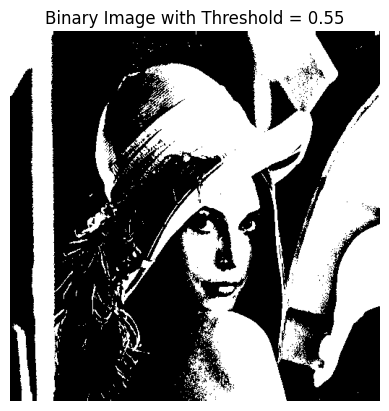

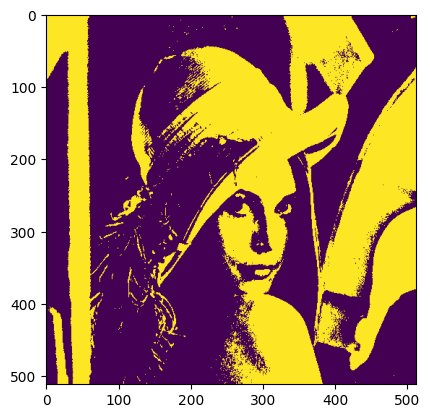

In [45]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray_image = RGB2Gray(image)
    else:
        gray_image = image # Assume it's already grayscale

    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimage = (gray_image >= T).astype(np.uint8) * 255 # Threshold and convert to 0 or 255

    #write code to visualize the resultant image
    plt.imshow(bimage, cmap='gray') # Use 'gray' colormap for binary image
    plt.title(f'Binary Image with Threshold = {T}')
    plt.axis('off')
    plt.show()

    return bimage
plt.imshow(Gray2Binary(image, 0.55))

An image is nothing but a matrix. Hence one can perform all kinds of mathematical operations on an image just like a matrix.



 To convince ourselves with the above statement, let's crop a section of a gray image, print its value, and perform some mathematical operations. For a better data display, we will cut only 5*5 areas of the gray image.

######  Task2.3:  Crop a 5*5 section of a gray image

Cropped Patch Values:
[[0.56772824 0.56772824 0.55905177 0.51672197 0.56375804]
 [0.54481059 0.52776707 0.57304354 0.58937532 0.5469502 ]
 [0.50504981 0.54236393 0.59485571 0.54541569 0.52098785]
 [0.53667256 0.57763647 0.54577138 0.48808393 0.51927726]
 [0.56793256 0.55080471 0.51371922 0.5273553  0.55561961]]


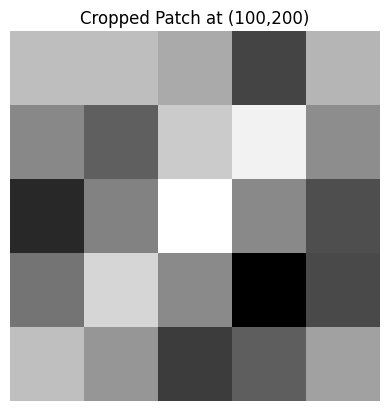

In [46]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    #code to check if input is RGB , if its RGB convert it to gray
    if len(image.shape) == 3:
        gray_image = RGB2Gray(image)
    else:
        gray_image = image

    #code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = gray_image[r0:r0+5, c0:c0+5]

    # visualize patch and print its value
    print("Cropped Patch Values:")
    print(patch)

    plt.imshow(patch, cmap='gray')
    plt.title(f'Cropped Patch at ({r0},{c0})')
    plt.axis('off')
    plt.show()

    return patch
patch = ImageCrop(image, 100, 200)

Now you have 5*5 patch and you know its values too. Can you try


1. multiplying patch by 0.5
2. multiplying patch by 2
3. create another random 5*5 patch (numpy array) and add/subtract it to the patch

Does it follow matrix addition/subtraction and multiplication rules? You can also play around with other matrix operations.

In [47]:
# 1. Multiply patch by 0.5
patch_multiplied_0_5 = patch * 0.5
print("Patch multiplied by 0.5:")
print(patch_multiplied_0_5)

# 2. Multiply patch by 2
patch_multiplied_2 = patch * 2
print("\nPatch multiplied by 2:")
print(patch_multiplied_2)

# 3.To Create another random 5*5 patch and add it to the patch
random_patch = np.random.rand(5, 5) # Create a 5x5 array with random values between 0 and 1
patch_added_random = patch + random_patch
print("\nPatch added to a random 5x5 patch:")
print(patch_added_random)

# 4.To Create another random 5*5 patch and subtract it from the patch
patch_subtracted_random = patch - random_patch
print("\nPatch subtracted by a random 5x5 patch:")
print(patch_subtracted_random)


Patch multiplied by 0.5:
[[0.28386412 0.28386412 0.27952589 0.25836098 0.28187902]
 [0.2724053  0.26388353 0.28652177 0.29468766 0.2734751 ]
 [0.25252491 0.27118196 0.29742785 0.27270785 0.26049393]
 [0.26833628 0.28881824 0.27288569 0.24404197 0.25963863]
 [0.28396628 0.27540236 0.25685961 0.26367765 0.27780981]]

Patch multiplied by 2:
[[1.13545648 1.13545648 1.11810354 1.03344394 1.12751609]
 [1.08962119 1.05553413 1.14608707 1.17875063 1.0939004 ]
 [1.01009963 1.08472786 1.18971141 1.09083138 1.0419757 ]
 [1.07334511 1.15527295 1.09154276 0.97616786 1.03855453]
 [1.13586511 1.10160942 1.02743845 1.0547106  1.11123923]]

Patch added to a random 5x5 patch:
[[1.43518709 1.55340192 1.07169179 1.02744077 0.60401225]
 [0.72022665 1.11652779 1.52913598 1.16092665 0.56757916]
 [1.32973486 0.55573212 1.41028355 0.65749892 1.14710946]
 [1.02276375 1.15340808 0.68766636 0.75773022 1.20185848]
 [0.97712919 0.96509927 0.9336331  1.33602549 1.04467411]]

Patch subtracted by a random 5x5 patch:
[

Comments on matrix operations:

> Yes, these operations follow standard matrix rules as implemented by NumPy.
 Scalar multiplication (multiplying by 0.5 or 2) multiplies each element in the array by the scalar.
 Addition and subtraction of two arrays of the same shape perform element-wise addition and subtraction.

###### Task2.4: Uniform Brightness Scaling


### Hopefully, you are convinced that an image is a matrix. Hence we can perform multiplication/division or addition/subtraction operations. These operations will change the brightness value of the image; can make an image brighter or darker depending on the multiplying/scaling factor. For this task, let's change the image brightness uniformly.
Consider scale to be 0.3,0.5,1,2 for four different cases. What is your observation?

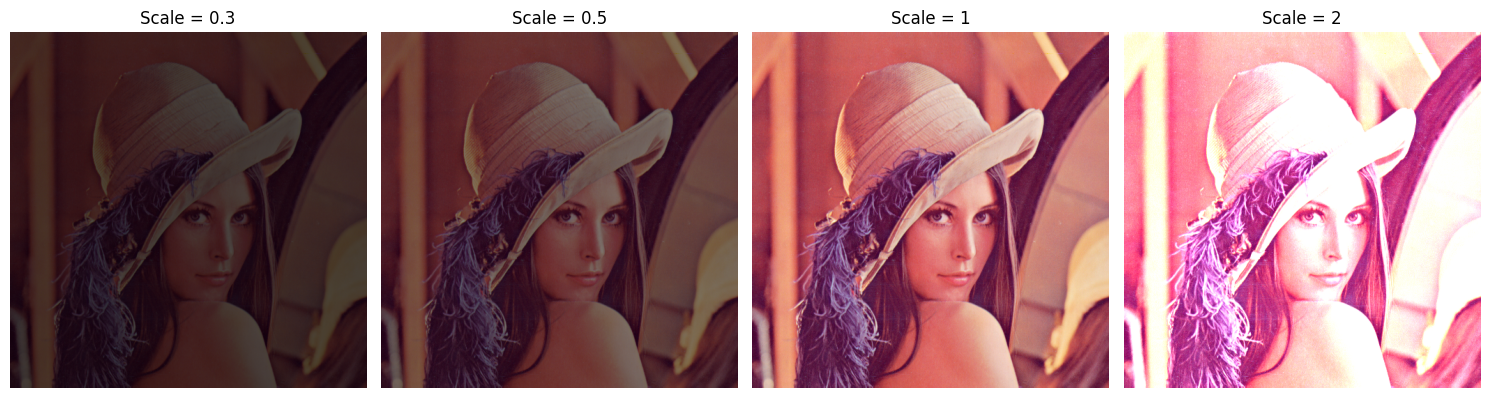

In [48]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    # write your code here
    output = image * scale

    # Clip the values to the valid range [0.0, 1.0] after scaling
    output = np.clip(output, 0.0, 1.0)

    return output

# To Visualize each channel in a separate subplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(UniformBrightScaling(image,0.3))
plt.title("Scale = 0.3")
plt.axis('off') # Hide axes for cleaner visualization

plt.subplot(1, 4, 2)
plt.imshow(UniformBrightScaling(image, 0.5))
plt.title("Scale = 0.5")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(UniformBrightScaling(image, 1))
plt.title("Scale = 1")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(UniformBrightScaling(image, 2))
plt.title("Scale = 2")
plt.axis('off')

plt.tight_layout()
plt.show()

 # Observation: Multiplying the image pixel values by a factor less than 1 decreases the brightness, while multiplying by a factor greater than 1 increases the brightness.

### Image Normalization

Image normalization is a process used to adjust image pixel values to a common range. This is often done to make the image more suitable for processing or analysis, especially when dealing with variations in lighting or sensor responses. A common normalization technique is to scale the pixel values to a range like [0, 1] or [0, 255].

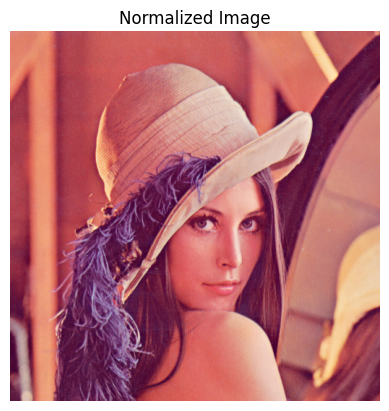

In [49]:
## Image normalization
# A simple way to normalize a floating-point image to the range [0, 1]
# First, ensure the image is in a floating-point format if it's not already
image_float = image.astype(np.float32)

# To Find the minimum and maximum values in the image
min_val = np.min(image_float)
max_val = np.max(image_float)

# To Perform min-max normalization
# Normalized_image = (image - min_val) / (max_val - min_val)
# Avoid division by zero if min_val and max_val are the same
if max_val - min_val > 0:
    normalized_image = (image_float - min_val) / (max_val - min_val)
else:
    normalized_image = image_float

plt.imshow(normalized_image)
plt.title("Normalized Image")
plt.axis('off')
plt.show()

# 3. Image Filtering

In this section, you will perform some of the image filtering techniques.

---

Convolution is one of the most widely used operations for images. Convolution can be used as a feature extractor; different kernel results in various types of features.
Refer   https://en.wikipedia.org/wiki/Kernel_(image_processing) to see few examples of kernel.


In [50]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first to convert RGB to gray
    l = len(image.shape)
    if l == 3:
        gray_image = RGB2Gray(image)
    else:
        gray_image = image

    #code to create a zero array of size (r,c) which will store the resultant value at specific pixel location
    r, c = gray_image.shape
    output = np.zeros_like(gray_image)

    #code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.
    pad_img = np.zeros((r + 2, c + 2))

    #now to copy gray image to above created array at location starting from (1,1)
    pad_img[1:r+1, 1:c+1] = gray_image

    #code to convolve the image
    for row in range(r):
        for col in range(c):
            patch = pad_img[row:row+3, col:col+3]
            output[row, col] = np.sum(patch * kernel) # Element-wise multiplication and sum

    return output
plt.imshow(feature_extractor(image,np.array([[0,1,0],[1,1,1],[0,1,0]])))

In [51]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

for the above case, consider all 3 * 3 kernels from https://en.wikipedia.org/


wiki/Kernel_(image_processing). What was your observation with different kernels? You can also play with other kernels, take any 3*3 matrix of your choice, convolve it with a gray image and see if it extracts some image features. (You should be able to correlate your learning from this experiment during CNN lectures)

# 4.Geometric Transformation

In all of the above cases, you performed operations on the pixel value, i.e., photometric transformations. Now for this section, you will apply the transformations on pixel locations, i.e., spatial transformations
It is advised to go through below mentioned references(in order) before proceeding to this section:
1. https://www.youtube.com/watch?v=7liGDs9Vf-I&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=6
2. https://www.youtube.com/watch?v=FleSNIZp2kc&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=8
3. https://www.youtube.com/watch?v=NYkMk17J9O0&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=9
4. https://www.youtube.com/playlist?list=PLfZZTc8qI7Hc7n4Y2xZcfPbsd5K6eMhPE (L09-L13)

###### Task4.1: Image Rotation (In-plane)

Write a function which rotates an image by 10 degrees in anticlockwise direction. (You can use inbuit functions for this, however it is encouraged to write code from scratch )


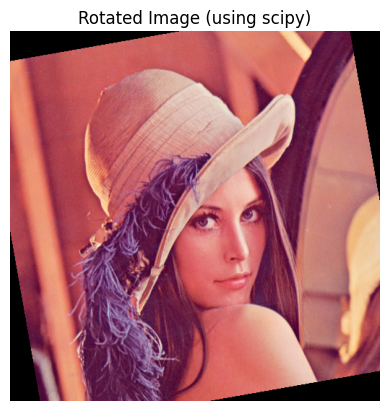

In [52]:
from scipy.ndimage import rotate

# Rotate the image by 10 degrees anticlockwise
# The 'reshape=False' argument ensures the output image has the same shape as the input image,
rotated_image = rotate(image, angle=10, reshape=False)

# To display the rotated image
plt.imshow(rotated_image)
plt.title("Rotated Image (using scipy)")
plt.axis('off')
plt.show()